In [1]:
import sys
sys.path.append('../scripts')
from scripts.cross_validation import loocv, k_fold_cv
from sklearn import ensemble
from scripts.data_preprocessing import load_data, exclude_outliers


# Load and preprocess data
X, y = load_data()

# Exclude outliers
X_filtered, y_filtered = exclude_outliers(X, y)

Number of duplicates: 4
Number of outliers:  14


C:\Users\Tea\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


LOOCV
R squared (LOOCV): -1.3653294730817325
Average MSE (LOOCV): 111.10714073106486
Average RMSE (LOOCV): 10.540737200550295
Average MAE (LOOCV): 5.08183480103265


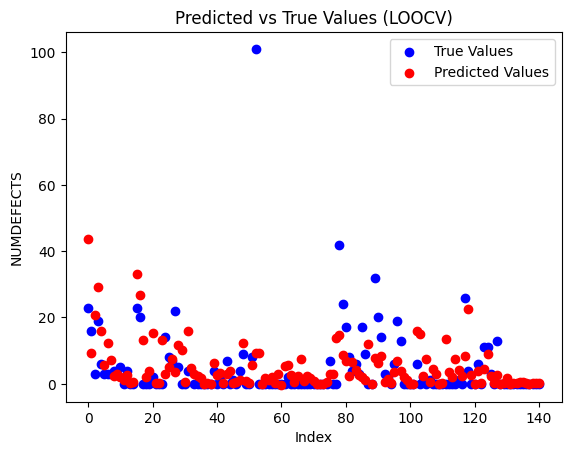

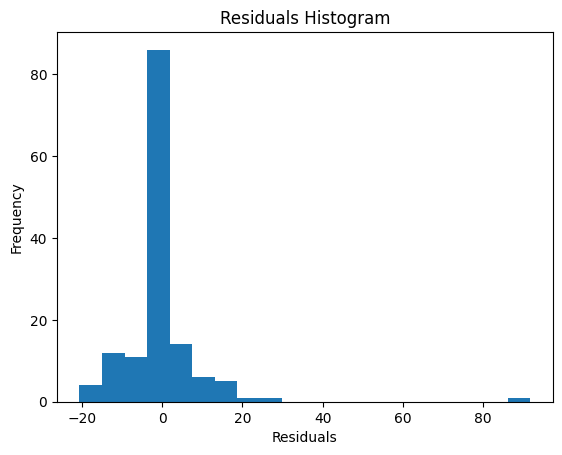


10-fold
Mean MSE: 133.34128754573473
Mean MAE: 6.166559252783045
Mean R2: -0.7671105710095646
RMSE 11.547349806156161


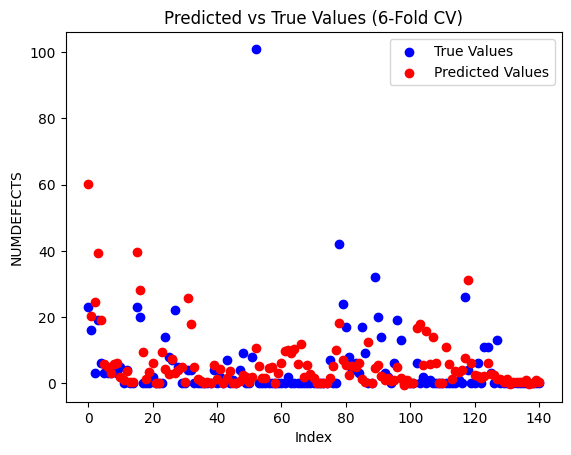

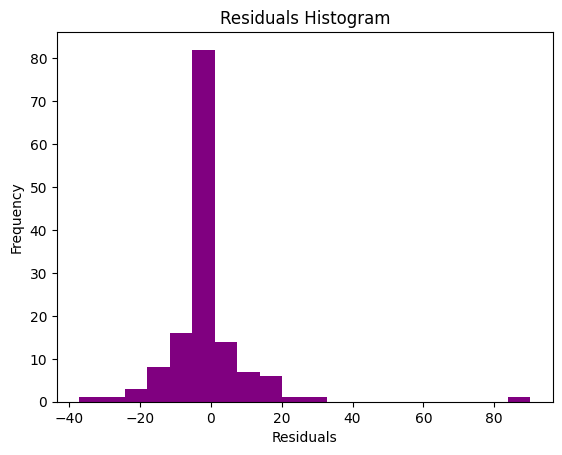

In [2]:
# Define the parameter grid for Grid Search
# param_grid = {
#     "n_estimators": [100, 200, 500],
#     "max_depth": [3, 6, 9],
#     "max_leaf_nodes": [2, 6],
#     "learning_rate": [0.001, 0.01, 0.1, 1],
# }

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

# Initialize the model
gboost = ensemble.GradientBoostingRegressor(**params)

# Evaluate with LOOCV and k-fold
print('LOOCV')
loocv(X, y, gboost)

print('\n10-fold')
k_fold_cv(X, y, gboost, 6)

LOOCV
R squared (LOOCV): -0.8909093636032233
Average MSE (LOOCV): 34.859849790423226
Average RMSE (LOOCV): 5.9042230471437325
Average MAE (LOOCV): 3.653823163393096


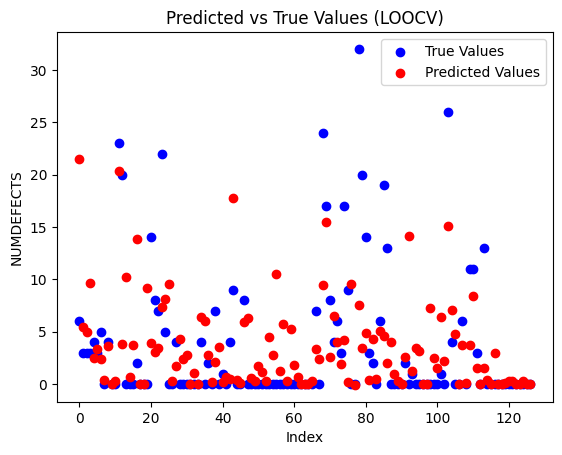

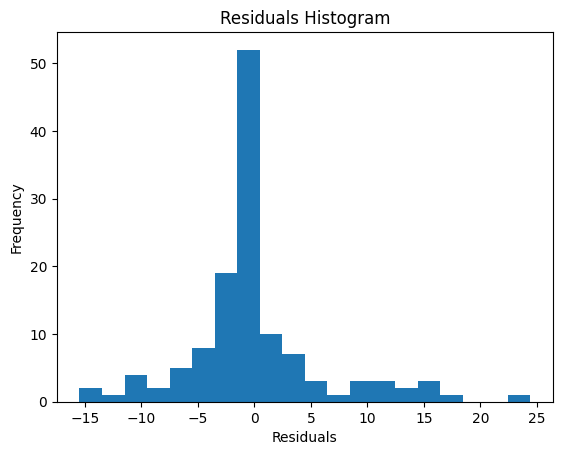


10-fold
Mean MSE: 45.6219239400446
Mean MAE: 4.125886441243737
Mean R2: -0.6253117258940185
RMSE 6.75440033904155


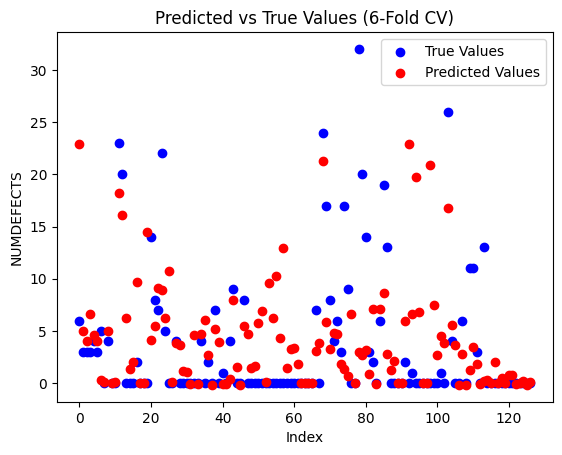

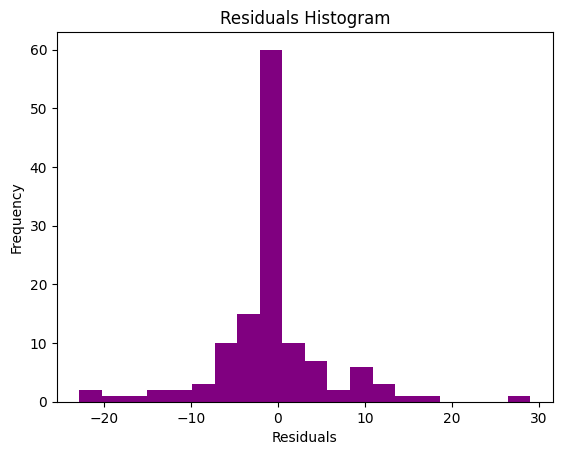

In [3]:
print('LOOCV')
loocv(X_filtered, y_filtered, gboost)

print('\n10-fold')
k_fold_cv(X_filtered, y_filtered, gboost, 6)